# Image classification



### importing required libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
# Class names of each images in the dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
# we have 60000 images for train a model with 28x28 diamension
train_images.shape

(60000, 28, 28)

In [5]:
# 60000 labels each for images in train_images
len(train_labels)

60000

In [6]:
# train_labels contains the number from 1 to 9, each number points a label of images in train_images
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
# for testing the model, there is 10000 images of 28x28 diamension
test_images.shape

(10000, 28, 28)

In [8]:
# 10000 labels each for images in the test_images
len(test_labels)

10000

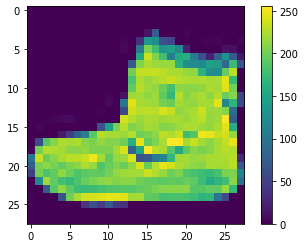

In [9]:
# It is the plot of first image in the train_image usign matplotlib (plt)
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
# normalizing the pixels values to the scale of 0 to 1
train_images = train_images/255.0
test_images = test_images/255.0

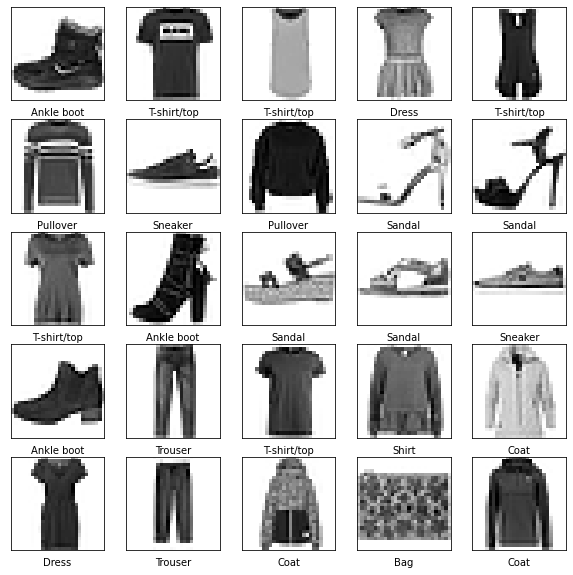

In [11]:
# ploting some images in the train_imges with label using matplotlib(plt), here we plots first 25 images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    
plt.show()

In [12]:
# building a Sequential model using Tensorflow (tf)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

2022-08-02 07:03:14.501327: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [13]:
# compiling the model
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [14]:
# fitting training data to train the model
model.fit(train_images, train_labels, epochs=10)

2022-08-02 07:03:15.200348: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4993 - accuracy: 0.8248
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3742 - accuracy: 0.8653
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3360 - accuracy: 0.8763
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3139 - accuracy: 0.8845
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2953 - accuracy: 0.8910
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2815 - accuracy: 0.8956
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2691 - accuracy: 0.8996
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2573 - accuracy: 0.9053
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2502 - accuracy: 0.9058
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.237

In [15]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - loss: 0.3696 - accuracy: 0.8745


### Making predictions 

In [16]:
# make predictions using softmax probability
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [17]:
predictions = probability_model.predict(test_images)

In [18]:
predictions[0]

array([2.6930335e-05, 1.5346276e-10, 2.2135561e-07, 1.1815648e-10,
       1.1574983e-07, 1.3438741e-02, 8.3329833e-06, 8.5520130e-03,
       2.1862874e-08, 9.7797364e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [19]:
np.argmax(predictions[0])

9

This prediction points to class 9 (ankle boot)

In [20]:
test_labels[0]

9

In [21]:
# defining a function for ploting the image with predicted label and actual label
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)


# defining a function to plot the prediction using a bar plot, 
# for prediction --> red bar, actual label --> blue bar, 
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

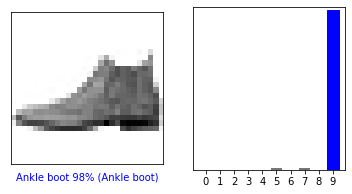

In [22]:
# ploting the prediction of first element in the test_images
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

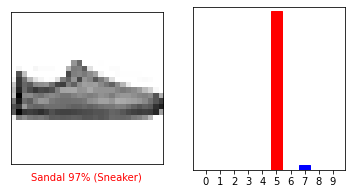

In [23]:
# ploting the prediction of 13th element in the test_images
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

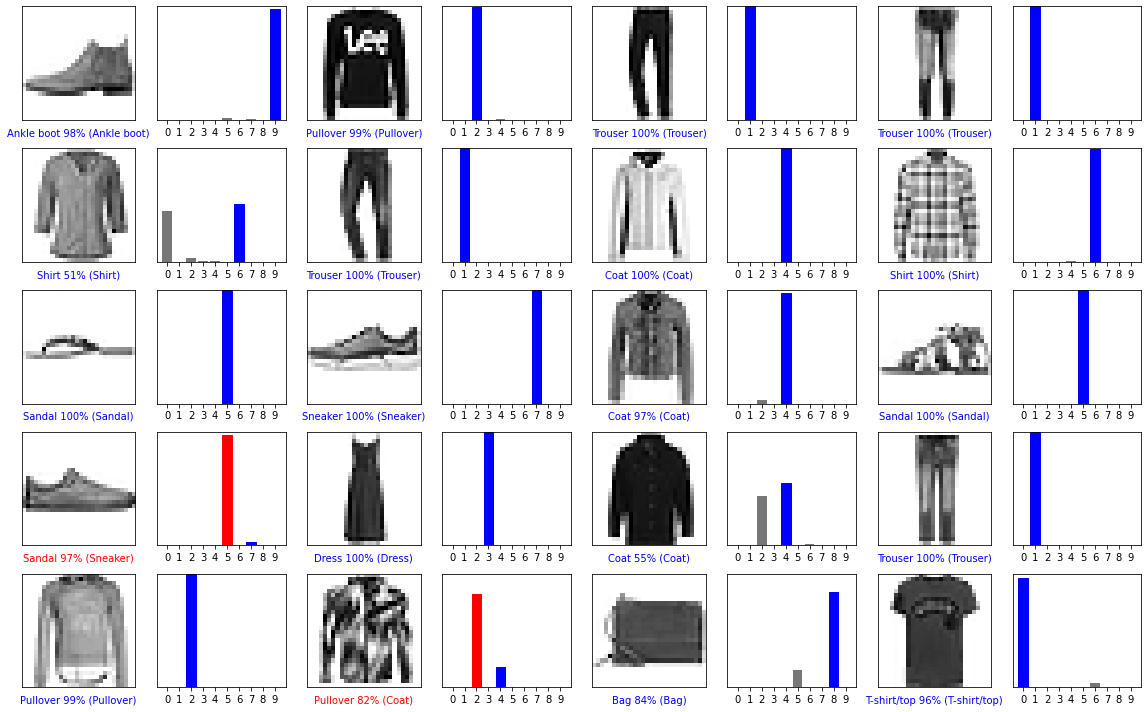

In [24]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

This note is reffered from Tensorflow tutorials page